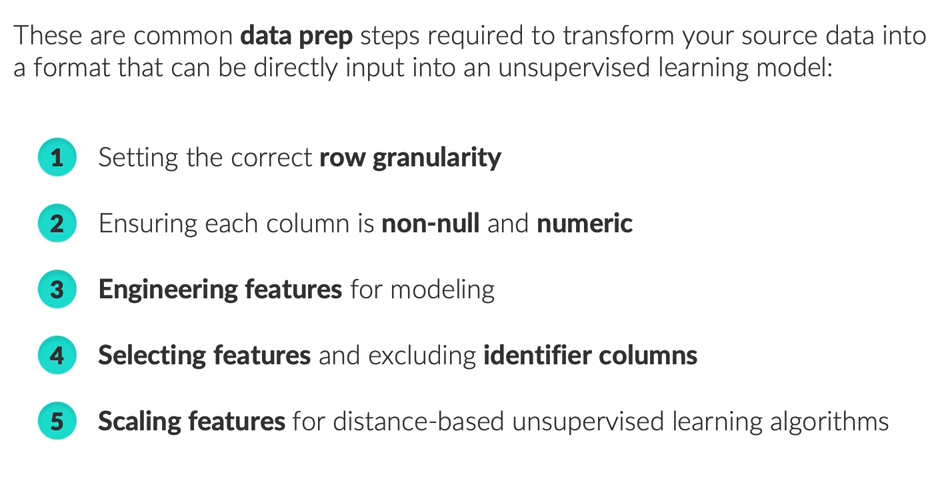

We are gonna follow this order.

* **Row granularity:** Each row should contain info of one customers only.
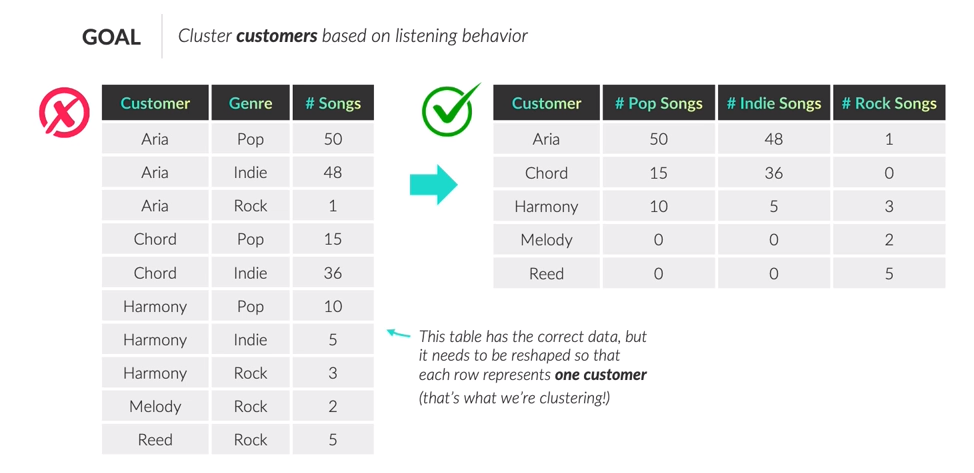

In [23]:
# create a sample dataframe
import pandas as pd

songs_dict = {
                'Customer': ['Aria', 'Aria', 'Aria', 'Chord', 'Chord', 'Harmony', 'Harmony', 'Harmony', 'Melody', 'Reed'],
                'Genre': ['Pop', 'Indie', 'Rock', 'Pop', 'Indie', 'Pop', 'Indie', 'Rock', 'Rock', 'Rock'],
                '# Songs': [50, 48, 1, 15, 36, 10, 5, 3, 2, 5]
             }

df = pd.DataFrame(songs_dict)
df

,Customer,Genre,# Songs
0,Aria,Pop,50
1,Aria,Indie,48
2,Aria,Rock,1
3,Chord,Pop,15
4,Chord,Indie,36
5,Harmony,Pop,10
6,Harmony,Indie,5
7,Harmony,Rock,3
8,Melody,Rock,2
9,Reed,Rock,5


In [25]:
# Group by
df.groupby('Customer')['# Songs'].sum().reset_index()

,Customer,# Songs
0,Aria,99
1,Chord,51
2,Harmony,18
3,Melody,2
4,Reed,5


In [5]:
df.groupby('Customer')['#songs'].mean().reset_index()

,Customer,#songs
0,Aria,33.0
1,Chord,25.5
2,Harmony,7.5
3,Melody,2.5
4,Reed,5.0


In [26]:
df

,Customer,Genre,# Songs
0,Aria,Pop,50
1,Aria,Indie,48
2,Aria,Rock,1
3,Chord,Pop,15
4,Chord,Indie,36
5,Harmony,Pop,10
6,Harmony,Indie,5
7,Harmony,Rock,3
8,Melody,Rock,2
9,Reed,Rock,5


In [27]:
customers_gby= df.groupby('Customer')['# Songs'].sum().reset_index()
customers_gby

,Customer,# Songs
0,Aria,99
1,Chord,51
2,Harmony,18
3,Melody,2
4,Reed,5


### Syntax of pivot

df.pivot(index = 'what you wanna see in each row in 1st column', columns = 'the values of a particular column that you wanna see as rest of the rows',values = 'values of a column that you wanna see to be substituted in the rest of the columns')

In [31]:
customers_pivt = df.pivot(index='Customer',columns='Genre',values='# Songs').fillna(0).reset_index()
customers_pivt

Genre,Customer,Indie,Pop,Rock
0,Aria,48.0,50.0,1.0
1,Chord,36.0,15.0,0.0
2,Harmony,5.0,10.0,3.0
3,Melody,0.0,0.0,2.0
4,Reed,0.0,0.0,5.0


In [32]:
df

,Customer,Genre,# Songs
0,Aria,Pop,50
1,Aria,Indie,48
2,Aria,Rock,1
3,Chord,Pop,15
4,Chord,Indie,36
5,Harmony,Pop,10
6,Harmony,Indie,5
7,Harmony,Rock,3
8,Melody,Rock,2
9,Reed,Rock,5


In [35]:
df.pivot(index='Genre',columns='Customer',values='# Songs').fillna(0).reset_index() #fillna replaces NaN by 0 and reset_index sets the new index

Customer,Genre,Aria,Chord,Harmony,Melody,Reed
0,Indie,48.0,36.0,5.0,0.0,0.0
1,Pop,50.0,15.0,10.0,0.0,0.0
2,Rock,1.0,0.0,3.0,2.0,5.0


In [37]:
# assignment
new_df = pd.read_excel('entertainment.xlsx')
new_df

,name,entertainment,hours_per_week
0,Emily,video_games,5.1
1,Liam,video_games,4.9
2,Olivia,video_games,4.7
3,Noah,video_games,4.6
4,Ava,video_games,5.0
...,...,...,...
595,Jacob,books,5.8
596,Michael,books,4.8
597,Elijah,books,5.0
598,Daniel,books,5.8


In [40]:
new_df.pivot(index='name',columns='entertainment',values='hours_per_week').fillna(0).reset_index()

entertainment,name,books,movies,tv_shows,video_games
0,Aaliyah,0.5,1.5,4.6,4.9
1,Abigail,0.0,1.4,4.5,4.8
2,Addison,0.5,1.6,4.5,5.0
3,Adeline,3.5,4.4,4.5,6.6
4,Alana,2.8,3.9,3.8,5.6
...,...,...,...,...,...
145,Winifred,5.2,5.4,4.6,6.9
146,Xanthe,6.0,5.6,4.6,6.7
147,Zara,5.5,6.7,5.7,7.7
148,Zoe,0.0,1.5,6.1,5.2
